In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
np.random.seed(10)
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  

2023-05-31 18:31:52.671377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-31 18:31:52.671559: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
X_Train4D = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test4D = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')

In [3]:
from tensorflow.keras.utils import to_categorical
X_Train4D_norm = X_Train4D / 255  
X_Test4D_norm = X_Test4D / 255
y_TrainOneHot = to_categorical(y_Train)
y_TestOneHot = to_categorical(y_Test)

In [4]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D 

model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_1')) 
# Create Max-Pool 1  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_1'))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_2'))  
  
# Create Max-Pool 2  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_2'))  
  
# Add Dropout layer  
model.add(Dropout(0.25, name='dropout_1'))
model.add(Flatten(name='flatten_1'))
model.add(Dense(128, activation='relu', name='dense_1'))  
model.add(Dropout(0.5, name='dropout_2'))
model.add(Dense(10, activation='softmax', name='dense_2'))
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2

2023-05-31 18:32:03.886464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-31 18:32:03.886494: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-31 18:32:03.886526: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (r7515ed520): /proc/driver/nvidia/version does not exist
2023-05-31 18:32:03.886737: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
train_history = model.fit(x=X_Train4D_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=1)

2023-05-31 18:32:11.734599: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-05-31 18:32:11.735021: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3193955000 Hz


Epoch 1/10
160/160 [==============================] - 7s 41ms/step - loss: 0.5161 - accuracy: 0.8400 - val_loss: 0.1050 - val_accuracy: 0.9691
Epoch 2/10
160/160 [==============================] - 6s 40ms/step - loss: 0.1480 - accuracy: 0.9557 - val_loss: 0.0672 - val_accuracy: 0.9790
Epoch 3/10
160/160 [==============================] - 6s 40ms/step - loss: 0.1081 - accuracy: 0.9676 - val_loss: 0.0544 - val_accuracy: 0.9836
Epoch 4/10
160/160 [==============================] - 6s 40ms/step - loss: 0.0845 - accuracy: 0.9751 - val_loss: 0.0483 - val_accuracy: 0.9849
Epoch 5/10
160/160 [==============================] - 6s 40ms/step - loss: 0.0735 - accuracy: 0.9781 - val_loss: 0.0408 - val_accuracy: 0.9874
Epoch 6/10
160/160 [==============================] - 6s 40ms/step - loss: 0.0640 - accuracy: 0.9811 - val_loss: 0.0390 - val_accuracy: 0.9888
Epoch 7/10
160/160 [==============================] - 6s 39ms/step - loss: 0.0563 - accuracy: 0.9829 - val_loss: 0.0392 - val_accuracy: 0.9885

In [ ]:
!pip uninstall matplotlib==3.7.2

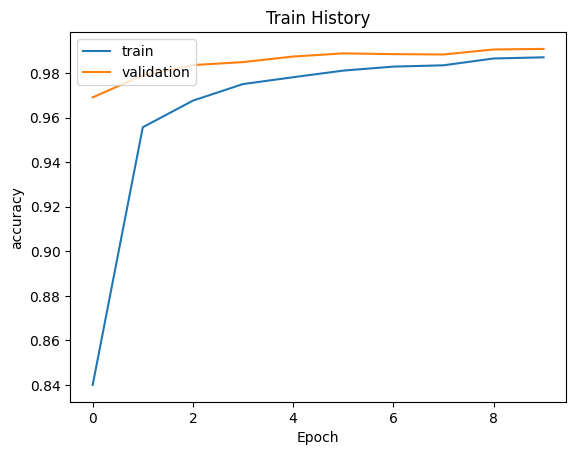

In [7]:
import matplotlib.pyplot as plt  
%matplotlib inline
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 


show_train_history(train_history, 'accuracy', 'val_accuracy')

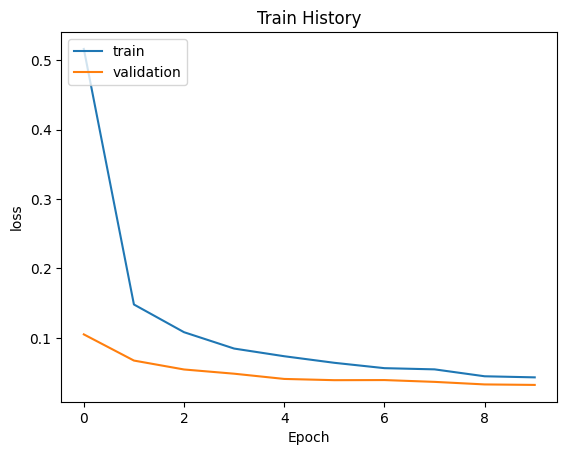

In [8]:
show_train_history(train_history, 'loss', 'val_loss')

In [9]:
scores = model.evaluate(X_Test4D_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 0.9920

	[Info] Accuracy of testing data = 99.2%


/home/hisky/anaconda3/envs/mnist/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


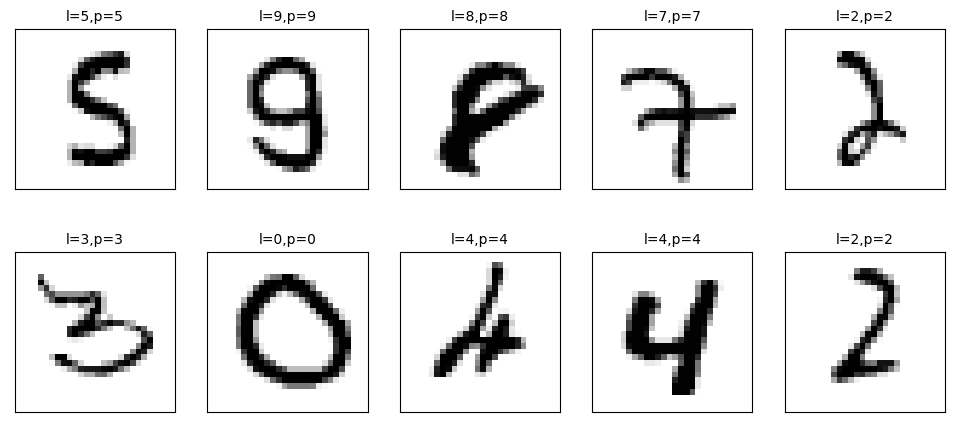

In [11]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

prediction = model.predict_classes(X_Test4D_norm)   
plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)